# Table of contents
<a href='#1.-Introduction'>Section 1 - Intro</a><br>
<a href='#2.-Retrieving-The-Data'>Section 2 - Retrieving The Data</a><br>
<a href='#3.-Glimpse-Of-Data'>Section 3 - Glimpse Of Data</a><br>
<a href='#4-Check-For-Missing-Data'>Section 4 - Missing Data</a><br/>
<a href='#5.-Data-Exploration'>Section 5 - Data Exploration</a><br/>

# 1. Introduction

The data was obtained from the University of St. Thomas' student information system (Banner). The data contains a variety of information about GPS students, such as enrollment, demographic, and academic success. The data has been de-identified in order to maintain FERPA guidelines.

<a id='section2'></a>
# 2. Retrieving the Data

In [1]:
import pandas as pd #used for data analysis
import numpy as snp # package for scientific computing with python
import matplotlib #package for mapping
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for making plots with seaborn
import plotly.plotly as py
import plotly.graph_objs as go

color = sns.color_palette()

import os
input_file = pd.ExcelFile(".\data\GPSRetention.xlsx")
GPSRetention = input_file.parse("Page1")
print('Size of GPS Retention',GPSRetention.shape)

Size of GPS Retention (933, 30)


# 3. Glimpse Of Data

In [17]:
GPSRetention.head()

,Fake_ID,STATUS_DESC,PROGRAM_DESC,MAJOR_DESC,SECOND_MAJOR_DESC,OUTCOME_NUMBER,OUTCOME_AWARDED_IND,CREDITS_ATTEMPTED,CREDITS_EARNED,GPA,...,NATION,PASSPORT_ISSUE_NATION_DESC,IMMIGRATION_STATUS,NATION_OF_BIRTH_DESC,NATION_OF_CITIZENSHIP_DESC,VISA_TYPE_DESC,GPS_Start_Term_,GPS_Last_Term_,Took_Non_GPS_Course_Within_Year?,Retained?
0,497255,Awarded,MS - Software Engineering,Software Management,NaN,1,A,42.0,42.0,3.800,...,US,NaN,NaN,NaN,NaN,NaN,201340,201620,0,1
1,532137,Sought/Tracked,MS - Software Engineering,Data Science,NaN,2,NaN,9.0,9.0,3.800,...,US,NaN,NaN,NaN,United States of America,NaN,201620,201720,0,0
2,556634,Sought/Tracked,MS - Software Engineering,Software Engineering,NaN,1,NaN,0.0,0.0,0.000,...,US,India,NRA,India,India,Academic Student,201620,201620,0,0
3,402342,Awarded,MS - Software Engineering,Information Technology,NaN,2,A,36.0,36.0,2.925,...,US,China,NRA,China,China,NaN,201540,201720,0,1
4,526883,Awarded,MS - Software Engineering,Data Science,NaN,1,A,36.0,36.0,3.975,...,US,NaN,NaN,NaN,United States of America,NaN,201440,201740,0,1


In [135]:
GPSRetention.values

array([[497255, 'Awarded', 'MS - Software Engineering', ..., 201620, 0, 1],
       [532137, 'Sought/Tracked', 'MS - Software Engineering', ..., 201720,
        0, 0],
       [556634, 'Sought/Tracked', 'MS - Software Engineering', ..., 201620,
        0, 0],
       ..., 
       [556401, 'Pending', 'MS - Software Engineering', ..., 201820, 0, 1],
       [446895, 'Awarded', 'MS - Software Engineering', ..., 201320, 1, 1],
       [479389, 'Sought/Tracked', 'MS - Software Engineering', ..., 201820,
        1, 1]], dtype=object)

# 4 Check For Missing Data


In [68]:
sum_total = GPSRetention.isnull().sum().sort_values(ascending= False)
count_total = GPSRetention.isnull().count().sort_values(ascending= False)
percent = (sum_total/count_total)*100

missing_gps_data = pd.concat([sum_total, percent], axis =1, keys=['Total','Percent'])
#giving warning need to fix this
missing_gps_data = missing_gps_data[(sum_total != 0)] #removing zeroes

#list(missing_gps_data.columns.values) #output column names

print(missing_gps_data.sort_values(by=['Percent'],ascending=False))

                            Total    Percent
VETERAN_CATEGORY_DESC         931  99.785638
SECOND_MAJOR_DESC             904  96.891747
VISA_TYPE_DESC                726  77.813505
IMMIGRATION_STATUS            679  72.775991
PASSPORT_ISSUE_NATION_DESC    647  69.346195
NATION_OF_BIRTH_DESC          595  63.772776
OUTCOME_AWARDED_IND           346  37.084673
NATION_OF_CITIZENSHIP_DESC    345  36.977492


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# 5. Data Exploration

## 5.1 Distribution of Major Desc

In [136]:
temp = GPSRetention["MAJOR_DESC"].value_counts()
#print("Total number of degree types : ",len(temp))
#print("Types and Counts:")
#print(temp)

temp_df = pd.DataFrame({'labels': temp.index,
                      'values': temp.values
                  })

trace = go.Pie(temp_df)
py.iplot([trace], filename='basic_pie_char')

## 5.2 Distibution of Status Desc

In [141]:
temp = GPSRetention["STATUS_DESC"].value_counts()

temp_df = pd.DataFrame({'labels': temp.index,
                      'values': temp.values
                  })

trace = go.Pie(temp_df)
py.iplot([trace], filename='basic_pie_char')

## 5.3 Distrbution of GPA

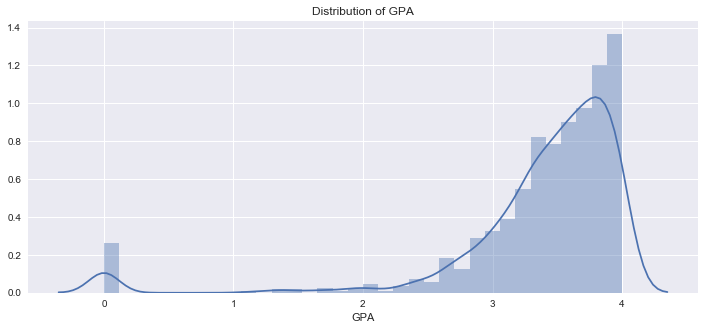

In [124]:
plt.figure(figsize=(12,5))
plt.title("Distribution of GPA")
x = GPSRetention["GPA"].dropna()
sns_plot = sns.distplot(x)
plt.show()

## 5.4 Distrbution of citizenship

In [140]:
temp = GPSRetention["CITIZENSHIP_DESC"].value_counts()

temp_df = pd.DataFrame({'labels': temp.index,
                      'values': temp.values
                  })

trace = go.Pie(temp_df)
py.iplot([trace], filename='basic_pie_char')

## 5.5 Distbrution of Gender

In [138]:
temp = GPSRetention["GENDER"].value_counts()

temp_df = pd.DataFrame({'labels': temp.index,
                      'values': temp.values
                  })

trace = go.Pie(temp_df)
py.iplot([trace], filename='basic_pie_char')

## 5.6 Distbrution of PRIMARY_ETHNICITY_DESC

In [139]:
temp = GPSRetention["PRIMARY_ETHNICITY_DESC"].value_counts()

temp_df = pd.DataFrame({'labels': temp.index,
                      'values': temp.values
                  })

trace = go.Pie(temp_df)
py.iplot([trace], filename='basic_pie_char')